# Per-Exercise Classification using fixed length signal of 2 seconds (200 rows) based on restimulus column

**Basic Imports and Helper Functions**

In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
def load_data_DB1(subject,exercise):
    data = loadmat(f'../Dataset/DB1/s{subject}/S{subject}_A1_E{exercise}.mat')
    return data

In [3]:
def get_start_indexes(data,movement,target):
    start_indexes=[]
    for idx,move in enumerate(data[target]):
        if move[0] == movement and data[target][idx-1][0] == 0:
            start_indexes.append(idx)
        if len(start_indexes) == 10:
            break
    return start_indexes

In [6]:
def get_movement_df(data,movement,target):
    '''
    Returns the repetitions of a movement based on fixed length of repetition.
    if target is stimulus then each rep takes 5 seconds but if target is restimulus then each rep takes 2 seconds
    '''
    start_indexes = get_start_indexes(data,movement,target)
    df= pd.DataFrame()
    step = 500 if target == 'stimulus' else 200
    for i in start_indexes:
        new_row = data['emg'][i:i+step].flatten()
        df = df.append(pd.Series(new_row),ignore_index=True)
    target_movement = np.full((10,1),movement,dtype=int)
    df['target'] = target_movement
    return df

## Classification of movements for two subjects (7, 19) to compare between different machine learning models

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000),
         "SVC": SVC(kernel='rbf'),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100),
         "KNN": KNeighborsClassifier(n_neighbors=5)}

### Subject 7

**Exercise 1**

In [114]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex1 = load_data_DB1(subject= 7, exercise=1)

ex1_movements = np.arange(1,13)
sub7_ex1_df = pd.DataFrame()

# Add movements to dataframe
for m in ex1_movements:
    sub7_ex1_df = sub7_ex1_df.append(get_movement_df(data=sub7_ex1, movement=m, target="restimulus"))

sub5_ex1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.2808,0.0073,0.0024,0.0049,0.0024,0.1660,0.2295,0.0854,0.2344,...,0.2319,0.8032,0.1807,0.0684,0.0366,0.3101,0.5054,0.1855,0.5005,1
1,0.0024,0.2026,0.0049,0.0024,0.0049,0.0024,0.1587,0.2686,0.0317,0.2344,...,0.1245,0.6128,0.1367,0.0537,0.0269,0.1343,0.3491,0.1001,0.3540,1
2,0.0024,0.2612,0.0269,0.0024,0.0024,0.0024,0.2637,0.3247,0.0220,0.1929,...,0.2637,0.6543,0.1880,0.0635,0.0464,0.3979,0.5957,0.1807,0.2319,1
3,0.0024,0.2271,0.0610,0.0024,0.0024,0.0024,0.1343,0.2832,0.0366,0.2100,...,0.5518,0.9619,0.2319,0.1001,0.0635,0.4785,0.8057,0.2197,0.5371,1
4,0.0024,0.3320,0.0464,0.0024,0.0024,0.0024,0.1733,0.2686,0.0415,0.3027,...,0.1660,0.7275,0.2612,0.1001,0.0513,0.2515,0.5737,0.2295,0.2539,1


In [115]:
X = sub7_ex1_df.drop("target", axis=1)
y = sub7_ex1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub7_ex1_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub7_ex1_accs[label] = round(model.score(X_test, y_test) * 100, 2)

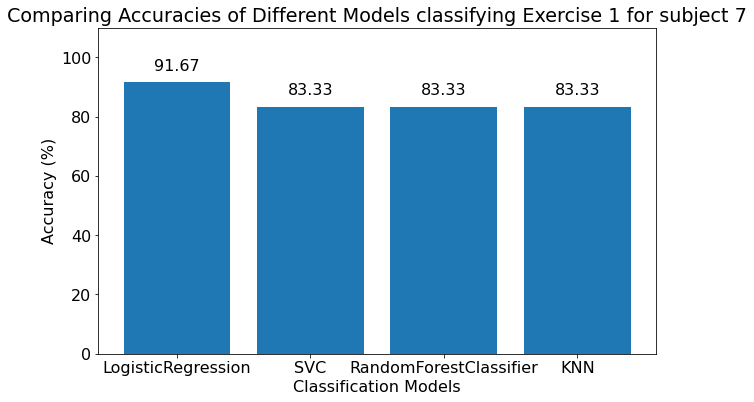

In [155]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub7_ex1_accs.keys(), sub7_ex1_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 1 for subject 7")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub7_ex1_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 2**

In [118]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex2 = load_data_DB1(subject= 7, exercise=2)

ex2_movements = np.arange(1,18)
sub7_ex2_df = pd.DataFrame()

# Add movements to dataframe
for m in ex2_movements:
    sub7_ex2_df = sub7_ex2_df.append(get_movement_df(data=sub7_ex2, movement=m, target="restimulus"))

sub7_ex2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.1416,0.4297,0.1636,0.0024,0.1685,...,0.6104,0.0171,0.0049,0.0220,0.1978,1.1890,0.5884,0.1099,0.5298,1
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.4272,0.1294,0.0024,0.1807,...,0.6177,0.0098,0.0244,0.0269,0.1904,1.2866,0.5811,0.1465,0.4126,1
2,0.0049,0.0024,0.0024,0.0024,0.0024,0.0879,0.5737,0.1416,0.0024,0.1831,...,0.4590,0.0073,0.0244,0.0293,0.1465,0.8765,0.5835,0.1343,0.3101,1
3,0.0024,0.0024,0.0024,0.0024,0.0049,0.0195,0.1538,0.1099,0.0024,0.1440,...,0.6104,0.0146,0.0220,0.0293,0.1660,1.2427,0.5444,0.1758,0.3735,1
4,0.0171,0.0024,0.0024,0.0024,0.0024,0.0562,0.4199,0.1343,0.0122,0.1880,...,0.6592,0.0342,0.0220,0.0391,0.2246,1.2549,0.6396,0.0854,0.3711,1


In [119]:
X = sub7_ex2_df.drop("target", axis=1)
y = sub7_ex2_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub7_ex2_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub7_ex2_accs[label] = round(model.score(X_test, y_test) * 100, 2)

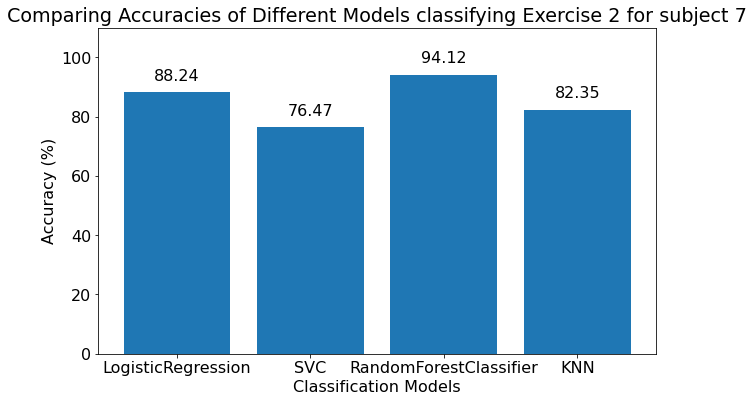

In [153]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub7_ex2_accs.keys(), sub7_ex2_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 2 for subject 7")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub7_ex2_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 3**

In [121]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex3 = load_data_DB1(subject= 7, exercise=3)

ex3_movements = np.arange(1,24)
sub7_ex3_df = pd.DataFrame()

# Add movements to dataframe
for m in ex3_movements:
    sub7_ex3_df = sub7_ex3_df.append(get_movement_df(data=sub7_ex3, movement=m, target="restimulus"))

sub7_ex3_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.0024,0.0195,0.0171,0.0293,0.2832,0.3101,0.0903,0.0024,0.2295,...,0.2319,0.0244,0.0757,0.3638,2.0068,0.3345,0.5591,0.3394,0.1538,1
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.1660,0.3809,0.0513,0.0024,0.2295,...,0.3271,0.0879,0.0562,0.3174,2.0557,0.4907,0.5249,0.3418,0.2246,1
2,0.0024,0.0024,0.0024,0.0024,0.0024,0.1221,0.2441,0.4199,0.0024,0.2515,...,0.0488,0.0171,0.1001,0.2490,1.2402,0.4199,0.5469,0.0439,0.2539,1
3,0.0024,0.0024,0.0049,0.0073,0.0049,0.0952,0.0610,0.2124,0.0024,0.2393,...,0.0708,0.0073,0.0195,0.2197,1.3208,0.2271,0.4175,0.1147,0.1733,1
4,0.0049,0.0024,0.0024,0.0024,0.0317,0.3735,0.1563,0.1245,0.0024,0.1636,...,0.0342,0.0049,0.0122,0.1611,1.0278,0.3760,0.4956,0.0342,0.1855,1


In [122]:
X = sub7_ex3_df.drop("target", axis=1)
y = sub7_ex3_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub7_ex3_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub7_ex3_accs[label] = round(model.score(X_test, y_test) * 100, 2)

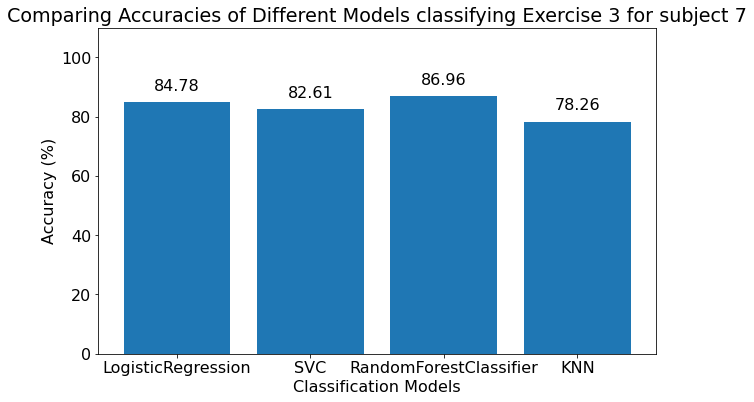

In [156]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))


ax.bar(sub7_ex3_accs.keys(), sub7_ex3_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 3 for subject 7")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub7_ex3_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

### Subject 19

**Exercise 1**

In [124]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub19_ex1 = load_data_DB1(subject= 19, exercise=1)

ex1_movements = np.arange(1,13)
sub19_ex1_df = pd.DataFrame()

# Add movements to dataframe
for m in ex1_movements:
    sub19_ex1_df = sub19_ex1_df.append(get_movement_df(data=sub19_ex1, movement=m, target="restimulus"))

sub19_ex1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0977,0.0024,0.0024,0.0024,0.0049,0.0024,0.0073,0.3564,0.0024,0.1318,...,0.0024,0.0293,0.0024,0.0024,0.0024,0.0024,0.2881,0.0171,0.0195,1
1,0.0342,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2856,0.0024,0.0854,...,0.0024,0.2344,0.0757,0.0049,0.0024,0.0073,0.2539,0.0806,0.0269,1
2,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2197,0.0024,0.0220,...,0.0024,0.2002,0.0659,0.0049,0.0024,0.0024,0.3247,0.0830,0.0171,1
3,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1270,0.0024,0.0122,...,0.0854,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.0024,0.0024,1
4,0.6763,0.1099,0.0244,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,...,0.0488,0.0928,0.0098,0.0024,0.0024,0.0024,0.2881,0.0171,0.0220,1


In [125]:
X = sub19_ex1_df.drop("target", axis=1)
y = sub19_ex1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub19_ex1_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub19_ex1_accs[label] = round(model.score(X_test, y_test) * 100, 2)

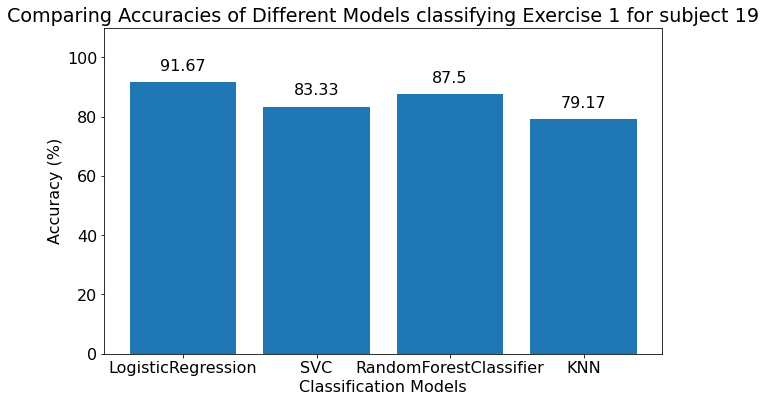

In [158]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub19_ex1_accs.keys(), sub19_ex1_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 1 for subject 19")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub19_ex1_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 2**

In [127]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub19_ex2 = load_data_DB1(subject= 19, exercise=2)

ex2_movements = np.arange(1,18)
sub19_ex2_df = pd.DataFrame()

# Add movements to dataframe
for m in ex2_movements:
    sub19_ex2_df = sub19_ex2_df.append(get_movement_df(data=sub19_ex2, movement=m, target="restimulus"))

sub19_ex2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,1.0376,0.1172,0.3271,0.2173,0.0220,0.0024,0.2588,0.4492,0.3271,2.0483,...,0.6201,0.1880,0.0098,0.0024,0.0024,0.0293,0.2563,0.0415,0.2856,1
1,0.6592,0.2710,0.0024,0.0024,0.0024,0.0024,0.0024,0.2051,0.0024,0.0098,...,0.2661,0.2637,0.0830,0.0024,0.0024,0.1025,0.3369,0.0635,0.3662,1
2,0.4370,0.4175,0.0024,0.0024,0.0024,0.0024,0.0195,0.4175,0.0024,0.0635,...,0.5029,0.4297,0.0439,0.0024,0.0024,0.1782,0.5981,0.1050,0.5933,1
3,0.5859,0.3101,0.0049,0.0024,0.0024,0.0024,0.0122,0.4639,0.0024,0.0659,...,0.6934,0.2637,0.0244,0.0024,0.0024,0.0708,0.2686,0.0537,0.7520,1
4,0.4004,0.3076,0.0024,0.0024,0.0024,0.0024,0.0146,0.3296,0.0024,0.0415,...,0.3394,0.4541,0.1904,0.0024,0.0024,0.0439,0.2759,0.2783,0.9302,1


In [128]:
X = sub19_ex2_df.drop("target", axis=1)
y = sub19_ex2_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub19_ex2_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub19_ex2_accs[label] = round(model.score(X_test, y_test) * 100, 2)

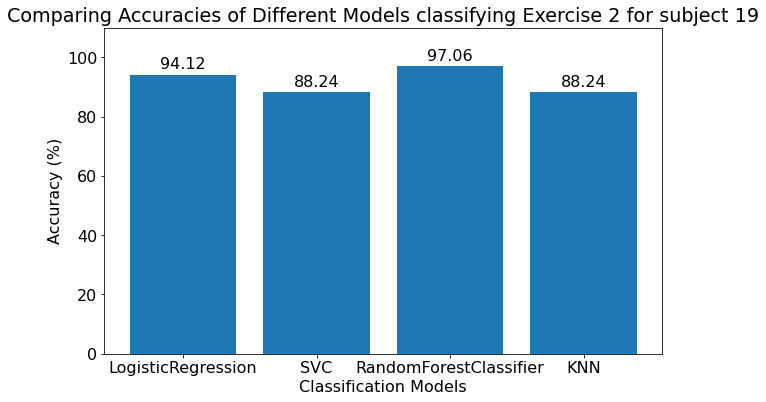

In [159]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub19_ex2_accs.keys(), sub19_ex2_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 2 for subject 19")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub19_ex2_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, round(label, 2 ), ha='center', va='bottom')

**Exercise 3**

In [133]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub19_ex3 = load_data_DB1(subject=19, exercise=3)

ex3_movements = np.arange(1,24)
sub19_ex3_df = pd.DataFrame()

# Add movements to dataframe
for m in ex3_movements:
    sub19_ex3_df = sub19_ex3_df.append(get_movement_df(data=sub19_ex3, movement=m, target="restimulus"))

sub19_ex3_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0757,0.0024,0.0024,0.0024,0.0024,0.0024,0.1538,0.0220,0.0024,0.0049,...,0.9351,0.0830,0.1270,0.0171,0.0488,1.3818,0.5396,0.0684,0.1929,1
1,0.1440,0.0366,0.0024,0.0024,0.0024,0.0024,0.0684,0.0122,0.0024,0.0122,...,0.5176,0.0024,0.0024,0.0024,0.0171,0.5615,0.1929,0.0024,0.0513,1
2,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0391,0.0366,0.0024,0.0049,...,0.4980,0.0195,0.0024,0.0024,0.0635,0.7495,0.3003,0.0024,0.1221,1
3,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.0488,0.0024,0.0391,...,0.4346,0.0293,0.0098,0.0024,0.0415,0.7080,0.3638,0.0073,0.0806,1
4,0.0562,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0635,0.0024,0.0220,...,0.5542,0.1099,0.0635,0.0171,0.0757,1.0718,0.4102,0.0244,0.1514,1


In [135]:
X = sub19_ex3_df.drop("target", axis=1)
y = sub19_ex3_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub19_ex3_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub19_ex3_accs[label] = round(model.score(X_test, y_test) * 100, 2)

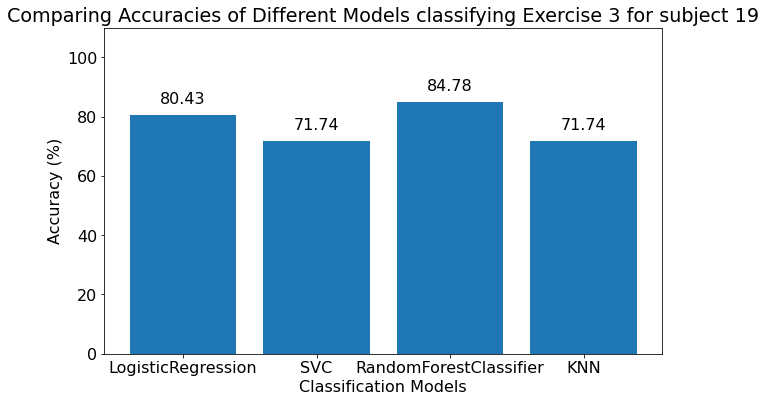

In [160]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub19_ex3_accs.keys(), sub19_ex3_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 3 for subject 19")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub19_ex3_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

### Classification of exercise 1 movements per subject using only the first 200 rows of each movement repetition based on restimulus column for each subject and calculating the avg for all subjects

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# training_acc_subjects = []
test_acc_subjects_ex1 = []

# random_states = [0,7,10,42,66,73,99,100,101,200]
ex1_movements = list(range(1,13))

# Iterate over 27 subjects of DB1 and trying to classify exercise 1 
for sub in list(range(1,28)):
    
    # Load the data 
    data = load_data_DB1(subject=sub, exercise=1)
    
    # Iterate over all movements and add them into a df
    df = pd.DataFrame()
    for m in ex1_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    
    # Getting X & y
    X = df.drop("target", axis=1)
    y = df["target"]

#     # Getting imp features using PCA
#     pca = PCA(n_components=0.95)
#     X_transformed = pca.fit_transform(X)
    
    training_acc_states = []
    test_acc_states = []
        
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100)

    #Fitting the model
    clf.fit(X_train, y_train)
#     training_score = clf.score(X_train, y_train))
    test_score = round(clf.score(X_test, y_test) * 100, 2)
    
#     training_mean_states = np.mean(training_acc_states)
#     test_mean_states = np.mean(test_acc_states)
    
#     print(f"Training Accuracy for subject {sub} in exercise 1 for 10 random states is {training_mean_states}")
    print(f"Test Accuracy for subject {sub} in exercise 1 is {test_score}")
    print("-----------------------------------------------------------------------------------")
#     training_acc_subjects.append(training_mean_states)
    test_acc_subjects_ex1.append(test_score)


# print(f"Average Training Accuracy for all subjects in exercise 1 {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracy for all subjects in exercise 1 {np.mean(test_acc_subjects_ex1)}")



Test Accuracy for subject 1 in exercise 1 is 83.33
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 in exercise 1 is 100.0
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 in exercise 1 is 83.33
-----------------------------------------------------------------------------------
Test Accuracy for subject 4 in exercise 1 is 91.67
-----------------------------------------------------------------------------------
Test Accuracy for subject 5 in exercise 1 is 83.33
-----------------------------------------------------------------------------------
Test Accuracy for subject 6 in exercise 1 is 95.83
-----------------------------------------------------------------------------------
Test Accuracy for subject 7 in exercise 1 is 83.33
-----------------------------------------------------------------------------------
Test Accuracy for subject 8 in exercise 1 is 91.67
----

Text(0, 0.5, 'Accuracy (%)')

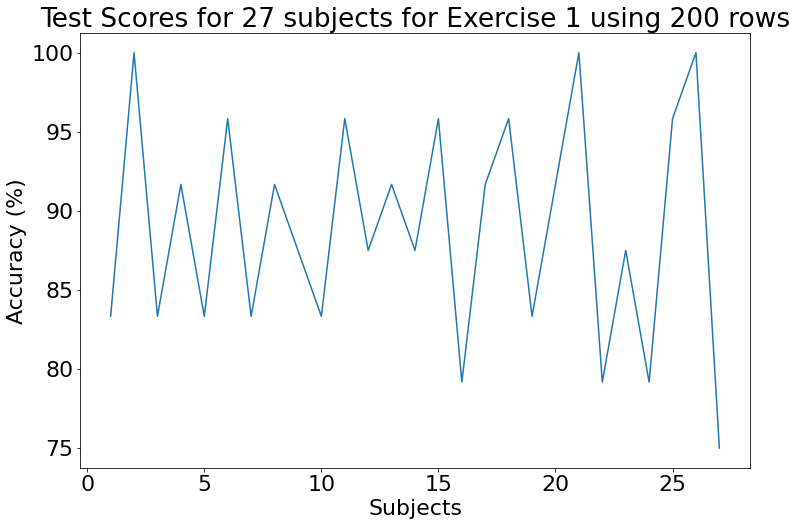

In [169]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

ax.plot(np.arange(1,28), test_acc_subjects_ex1)
ax.set_title("Test Scores for 27 subjects for Exercise 1 using 200 rows")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
# ax.set_xticks(np.arange(1,28));

### Classification of exercise 2 movements per subject using only the first 200 rows of each movement repetition based on restimulus column for each subject and calculating the avg for all subjects

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

test_acc_subjects_ex2 = []

ex2_movements = list(range(1,18))

# Iterate over 27 subjects of DB1 and trying to classify exercise 2 
for sub in list(range(1,28)):
    
    # Load the data 
    data = load_data_DB1(subject=sub, exercise=2)
    
    # Iterate over all movements and add them into a df
    df = pd.DataFrame()
    for m in ex2_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    
    # Getting X & y
    X = df.drop("target", axis=1)
    y = df["target"]
    
    training_acc_states = []
    test_acc_states = []
        
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100)

    #Fitting the model
    clf.fit(X_train, y_train)
#     training_score = clf.score(X_train, y_train))
    test_score = round(clf.score(X_test, y_test) * 100, 2)
    
    print(f"Test Accuracy for subject {sub} in exercise 2 is {test_score}")
    print("-----------------------------------------------------------------------------------")
#     training_acc_subjects.append(training_mean_states)
    test_acc_subjects_ex2.append(test_score)


# print(f"Average Training Accuracy for all subjects in exercise 1 {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracy for all subjects in exercise 2 {np.mean(test_acc_subjects_ex2)}")



Test Accuracy for subject 1 in exercise 2 is 82.35
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 in exercise 2 is 91.18
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 in exercise 2 is 82.35
-----------------------------------------------------------------------------------
Test Accuracy for subject 4 in exercise 2 is 88.24
-----------------------------------------------------------------------------------
Test Accuracy for subject 5 in exercise 2 is 79.41
-----------------------------------------------------------------------------------
Test Accuracy for subject 6 in exercise 2 is 82.35
-----------------------------------------------------------------------------------
Test Accuracy for subject 7 in exercise 2 is 94.12
-----------------------------------------------------------------------------------
Test Accuracy for subject 8 in exercise 2 is 100.0
----

Text(0, 0.5, 'Accuracy (%)')

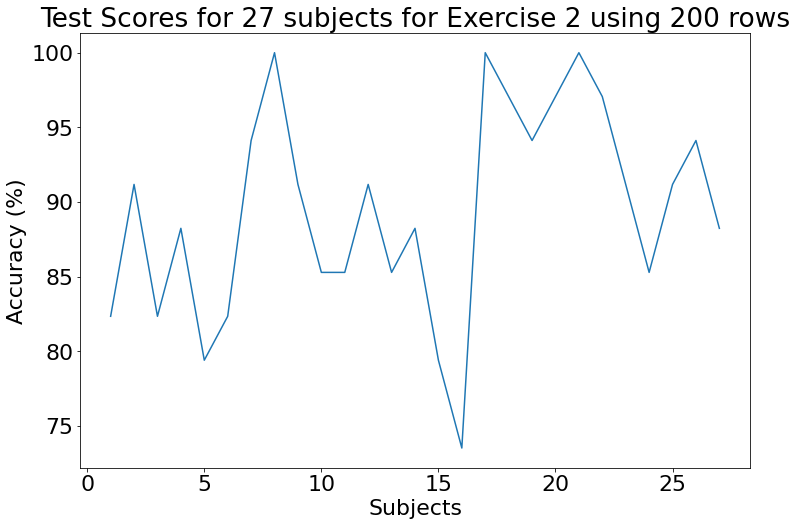

In [170]:
# Plot Average Accuracies for exercise 2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

ax.plot(np.arange(1,28), test_acc_subjects_ex2)
ax.set_title("Test Scores for 27 subjects for Exercise 2 using 200 rows")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
# ax.set_xticks(np.arange(1,28));

### Classification of exercise 3 movements per subject using only the first 200 rows of each movement repetition based on restimulus column for each subject and calculating the avg for all subjects

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

test_acc_subjects_ex3 = []

ex3_movements = list(range(1,24))

# Iterate over 27 subjects of DB1 and trying to classify exercise 3
for sub in list(range(1,28)):
    
    # Load the data 
    data = load_data_DB1(subject=sub, exercise=3)
    
    # Iterate over all movements and add them into a df
    df = pd.DataFrame()
    for m in ex3_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    
    # Getting X & y
    X = df.drop("target", axis=1)
    y = df["target"]
    
    training_acc_states = []
    test_acc_states = []
        
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100)

    #Fitting the model
    clf.fit(X_train, y_train)
#     training_score = clf.score(X_train, y_train))
    test_score = round(clf.score(X_test, y_test) * 100, 2)
    
    print(f"Test Accuracy for subject {sub} in exercise 3 is {test_score}")
    print("-----------------------------------------------------------------------------------")
#     training_acc_subjects.append(training_mean_states)
    test_acc_subjects_ex3.append(test_score)


# print(f"Average Training Accuracy for all subjects in exercise 3 {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracy for all subjects in exercise 3 {np.mean(test_acc_subjects_ex3)}")



Test Accuracy for subject 1 in exercise 3 is 89.13
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 in exercise 3 is 80.43
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 in exercise 3 is 67.39
-----------------------------------------------------------------------------------
Test Accuracy for subject 4 in exercise 3 is 65.22
-----------------------------------------------------------------------------------
Test Accuracy for subject 5 in exercise 3 is 78.26
-----------------------------------------------------------------------------------
Test Accuracy for subject 6 in exercise 3 is 84.78
-----------------------------------------------------------------------------------
Test Accuracy for subject 7 in exercise 3 is 86.96
-----------------------------------------------------------------------------------
Test Accuracy for subject 8 in exercise 3 is 78.26
----

Text(0, 0.5, 'Accuracy (%)')

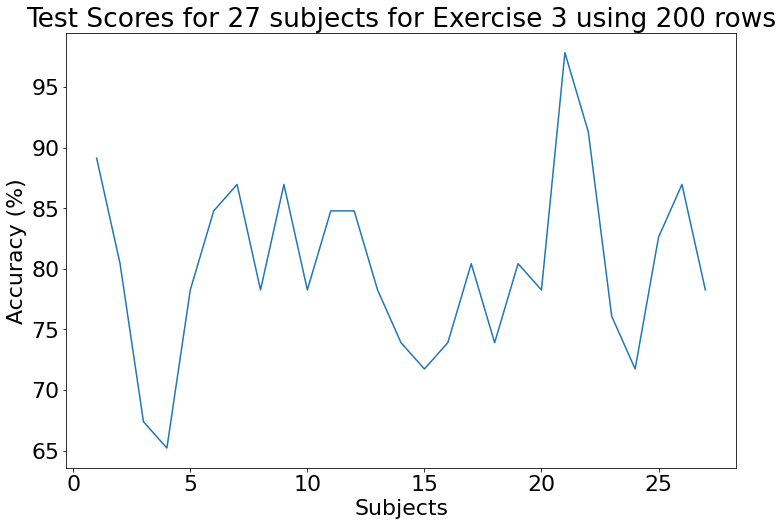

In [171]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

ax.plot(np.arange(1,28), test_acc_subjects_ex3)
ax.set_title("Test Scores for 27 subjects for Exercise 3 using 200 rows")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
# ax.set_xticks(np.arange(1,28));

**Comparing average accuracies for all subjects in the different exercises**

In [59]:
ex1_mean = np.mean(test_acc_subjects_ex1)
ex2_mean = np.mean(test_acc_subjects_ex2)
ex3_mean = np.mean(test_acc_subjects_ex3)

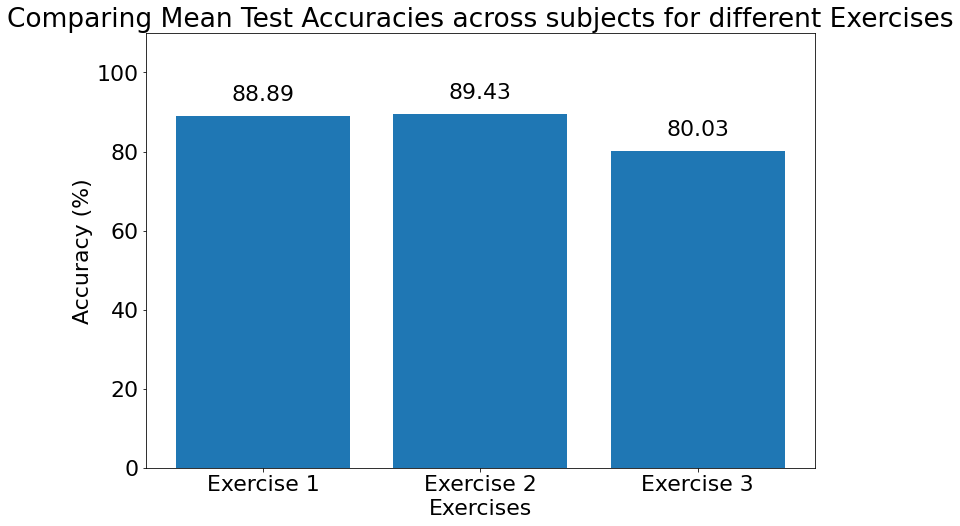

In [173]:
# Plot Bar graph to compare accuracy across exercises
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

exercises = ["Exercise 1", "Exercise 2", "Exercise 3"]
mean_accs = [ex1_mean, ex2_mean, ex3_mean]
ax.bar(exercises, mean_accs)
ax.set_title("Comparing Mean Test Accuracies across subjects for different Exercises")
ax.set_xlabel("Exercises")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accs):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

### Classification of exercise 1 movements PER SUBJECT using leave one out method and computing the average for all subjects using RandomForest Classifier

**Data is based on the concatenation of 200 rows of a movement repetition based on restimulus column**
Adding the data for all subjects except 1 to be training data and test the model on a subject it hasn't seen before.

In [138]:
ex1_movements = list(range(1,13))

df = pd.DataFrame()
# Load the data for all subjects except 1 to do leave-one out classification
for s in list(range(1,28)):
    data = load_data_DB1(subject=s, exercise=1)
    # Iterate over all movements and add them into a df
    for m in ex1_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0171,0.0073,0.0024,0.0024,0.0024,0.0024,0.0757,0.0317,0.0024,0.0146,...,0.0024,0.0195,0.0024,0.0024,0.0024,0.0146,0.0488,0.0073,0.0024,1
1,0.0488,0.0073,0.0024,0.0024,0.0024,0.0024,0.0171,0.0488,0.0024,0.0049,...,0.0269,0.0024,0.0049,0.0024,0.0024,0.0806,0.0659,0.0024,0.0024,1
2,0.0073,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.0391,0.0024,0.0049,...,0.2197,0.0562,0.0024,0.0024,0.0024,0.1318,0.0439,0.2441,0.0122,1
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0342,0.0024,0.0098,...,0.3931,0.2759,0.0171,0.0024,0.0024,0.3101,0.0952,0.5103,0.1880,1
4,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.0244,0.0049,0.0024,...,0.1685,0.0024,0.0122,0.0024,0.0024,0.1196,0.0537,0.0513,0.0024,1


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

training_acc_subjects = []
test_acc_leave_one_ex1 = []


# Iterate over 27 subjects of Database 1 and trying to classify exercise 1 
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * 120
    end_idx_rows = start_idx_rows + 120
    training_data = df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    test_data = df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    
    #Load data of the test subject 
#     left_out_sub = load_data_DB1(subject=sub, exercise=1)
#     left_out_sub_df = pd.DataFrame()
#     for m in ex1_movements:
#         left_out_sub_df = left_out_sub_df.append(get_movement_df(data=data, movement=m, target="restimulus"), ignore_index=True)
    
    

    
#     training_score = clf.score(X_train, y_train)
    test_score = round(clf.score(X_test, y_test) * 100, 2)
#     training_acc_subjects.append(training_score)
    test_acc_leave_one_ex1.append(test_score)
    
    # Display the subject results
#     print(f"The training accuracy leave subject {sub} out is {training_score}")
    print(f"The test accuracy leaving subject {sub} out for exercise 1 is {test_score}")
    print("-------------------------------------------------------------")
    
# print(f"Average Training Accuracies leaving each subject out once is {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracies leaving each subject out once for exercise 1 is {np.mean(test_acc_leave_one_ex1)}")
    
   

The test accuracy leaving subject 1 out for exercise 1 is 27.5
-------------------------------------------------------------
The test accuracy leaving subject 2 out for exercise 1 is 19.17
-------------------------------------------------------------
The test accuracy leaving subject 3 out for exercise 1 is 39.17
-------------------------------------------------------------
The test accuracy leaving subject 4 out for exercise 1 is 35.0
-------------------------------------------------------------
The test accuracy leaving subject 5 out for exercise 1 is 40.0
-------------------------------------------------------------
The test accuracy leaving subject 6 out for exercise 1 is 24.17
-------------------------------------------------------------
The test accuracy leaving subject 7 out for exercise 1 is 23.33
-------------------------------------------------------------
The test accuracy leaving subject 8 out for exercise 1 is 39.17
---------------------------------------------------------

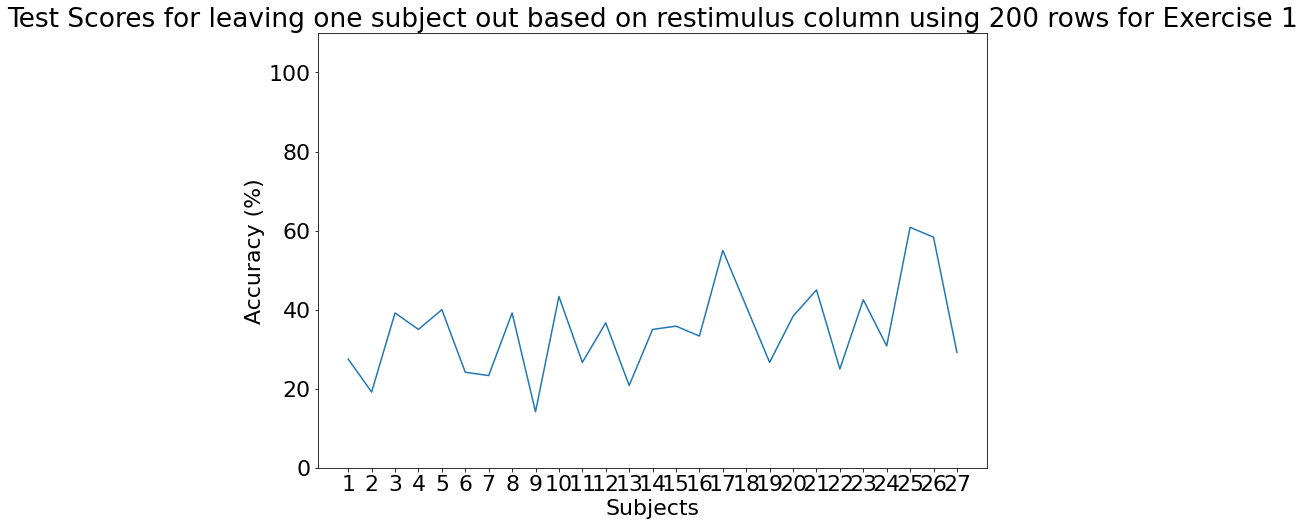

In [175]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
plt.rcParams.update({'font.size': 22})

ax.plot(np.arange(1,28), test_acc_leave_one_ex1)
ax.set_title("Test Scores for leaving one subject out for Exercise 1")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,110)
ax.set_xticks(np.arange(1,28));

### Classification of exercise 2 movements PER SUBJECT using leave one out method and computing the average for all subjects using RandomForest Classifier

**Data is based on the concatenation of 200 rows of a movement repetition based on restimulus column**
Adding the data for all subjects except 1 to be training data and test the model on a subject it hasn't seen before.

In [142]:
ex2_movements = list(range(1,18))

df = pd.DataFrame()

for s in list(range(1,28)):
    data = load_data_DB1(subject=s, exercise=2)
    # Iterate over all movements and add them into a df
    for m in ex2_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0488,0.0098,0.0024,0.0024,0.0049,0.0024,0.4077,0.1660,0.0024,0.0659,...,2.1631,1.0840,0.4980,0.2295,0.1172,0.5640,2.9077,1.0693,0.8081,1
1,0.1294,0.0220,0.0024,0.0024,0.0024,0.0024,0.3149,0.1294,0.0049,0.0977,...,1.3452,0.5273,0.1660,0.0757,0.0293,0.2954,3.0469,0.8691,0.4443,1
2,0.0513,0.0049,0.0024,0.0024,0.0024,0.0024,0.3467,0.1416,0.0024,0.0391,...,0.3516,0.1050,0.0195,0.0024,0.0024,0.0757,0.7007,0.1318,0.0293,1
3,0.0195,0.0244,0.0024,0.0024,0.0024,0.0024,0.0635,0.0806,0.0024,0.0122,...,0.3540,0.1025,0.0195,0.0024,0.0146,0.1538,0.5933,0.1074,0.0757,1
4,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.1587,0.0757,0.0024,0.0024,...,0.0757,0.0854,0.0024,0.0024,0.0024,0.0342,0.4907,0.0195,0.0049,1


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

training_acc_subjects = []
test_acc_leave_one_ex2 = []


# Iterate over 27 subjects of Database 1 and trying to classify exercise 2
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * 170
    end_idx_rows = start_idx_rows + 170
    # Dropping rows corresponding to test subject
    training_data = df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    # Grabbing the rows of the test subject
    test_data = df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    
#     training_score = clf.score(X_train, y_train)
    test_score = round(clf.score(X_test, y_test) * 100, 2)
#     training_acc_subjects.append(training_score)
    test_acc_leave_one_ex2.append(test_score)
    
    # Display the subject results
#     print(f"The training accuracy leave subject {sub} out is {training_score}")
    print(f"The test accuracy leaving subject {sub} out for exercise 2 is {test_score}")
    print("-------------------------------------------------------------")
    
# print(f"Average Training Accuracies leaving each subject out once is {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracies leaving each subject out once for exercise 2 is {np.mean(test_acc_leave_one_ex2)}")
    
   

The test accuracy leaving subject 1 out for exercise 2 is 35.83
-------------------------------------------------------------
The test accuracy leaving subject 2 out for exercise 2 is 32.5
-------------------------------------------------------------
The test accuracy leaving subject 3 out for exercise 2 is 17.5
-------------------------------------------------------------
The test accuracy leaving subject 4 out for exercise 2 is 50.0
-------------------------------------------------------------
The test accuracy leaving subject 5 out for exercise 2 is 21.67
-------------------------------------------------------------
The test accuracy leaving subject 6 out for exercise 2 is 28.33
-------------------------------------------------------------
The test accuracy leaving subject 7 out for exercise 2 is 35.0
-------------------------------------------------------------
The test accuracy leaving subject 8 out for exercise 2 is 45.83
----------------------------------------------------------

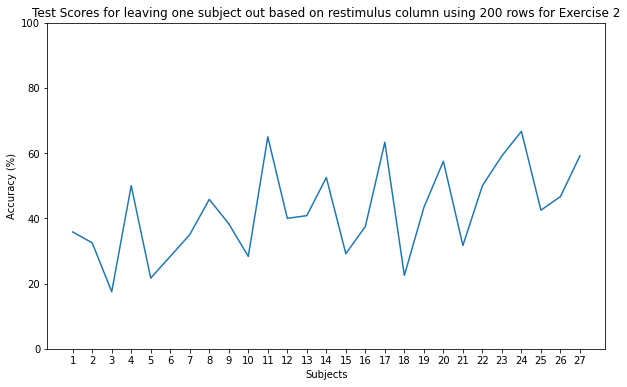

In [144]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(np.arange(1,28), test_acc_leave_one_ex2)
ax.set_title("Test Scores for leaving one subject out based on restimulus column using 200 rows for Exercise 2")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.set_xticks(np.arange(1,28));

### Classification of exercise 3 movements PER SUBJECT using leave one out method and computing the average for all subjects using RandomForest Classifier

**Data is based on the concatenation of 200 rows of a movement repetition based on restimulus column**
Adding the data for all subjects except 1 to be training data and test the model on a subject it hasn't seen before.

In [145]:
ex3_movements = list(range(1,24))

df = pd.DataFrame()

for s in list(range(1,28)):
    data = load_data_DB1(subject=s, exercise=3)
    # Iterate over all movements and add them into a df
    for m in ex3_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0122,0.0024,0.0122,0.0024,0.0073,0.0024,0.0122,0.0659,0.0024,0.0439,...,0.1685,0.9302,0.0073,0.0098,0.0513,0.5688,0.4321,0.4810,0.0757,1
1,0.0049,0.0024,0.0024,0.0024,0.0098,0.0024,0.0293,0.0903,0.0024,0.0391,...,0.0464,0.6567,0.2197,0.0024,0.0024,0.1245,0.1074,0.1831,0.0757,1
2,0.0098,0.0024,0.0024,0.0024,0.0098,0.0024,0.0024,0.1538,0.0024,0.0513,...,0.1538,0.8008,0.0146,0.0293,0.0903,0.6177,0.3052,0.3198,0.1025,1
3,0.0220,0.0024,0.0024,0.0024,0.0098,0.0049,0.0098,0.1050,0.0024,0.0513,...,0.1245,0.7544,0.0220,0.0024,0.0171,0.4883,0.2710,0.4492,0.0757,1
4,0.0146,0.0024,0.0024,0.0024,0.0049,0.0049,0.0317,0.1465,0.0024,0.0488,...,0.1465,0.5444,0.0146,0.0635,0.1074,0.7007,0.2930,0.1123,0.0708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,0.6982,0.1538,0.4712,0.0195,0.0049,0.0024,0.0342,0.4712,1.1426,0.0732,...,0.7837,0.7764,0.2197,0.1538,0.0903,0.6226,1.0596,0.1489,0.0977,23
6206,0.2686,0.0537,0.1929,0.0049,0.0049,0.0024,0.0073,0.2075,0.1147,0.0635,...,1.1035,0.8374,0.2637,0.0562,0.0659,0.4175,0.5835,0.2637,0.0537,23
6207,0.3491,0.1392,0.3320,0.0049,0.0024,0.0024,0.0122,0.2515,0.0732,0.0586,...,0.5273,0.4785,0.1025,0.0098,0.0439,0.3735,0.4492,0.1563,0.0732,23
6208,0.0757,0.0049,0.1172,0.0049,0.0049,0.0024,0.0049,0.0977,0.0659,0.0684,...,0.4639,0.1538,0.0659,0.0122,0.0146,0.6006,0.5444,0.1514,0.0684,23


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

training_acc_subjects = []
test_acc_leave_one_ex3 = []


# Iterate over 27 subjects of Database 1 and trying to classify exercise 3 
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * 230
    end_idx_rows = start_idx_rows + 230
    
    # Dropping the rows of the test subject
    training_data = df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    
    # Getting the rows of the test subject
    test_data = df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    

    test_score = round(clf.score(X_test, y_test) * 100, 2)

    test_acc_leave_one_ex3.append(test_score)
    
    # Display the subject results

    print(f"The test accuracy leaving subject {sub} out for exercise 3 is {test_score}")
    print("-------------------------------------------------------------")
    
# print(f"Average Training Accuracies leaving each subject out once is {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracies leaving each subject out once for exercise 3 is {np.mean(test_acc_leave_one_ex3)}")
    
   

The test accuracy leaving subject 1 out for exercise 3 is 7.5
-------------------------------------------------------------
The test accuracy leaving subject 2 out for exercise 3 is 27.5
-------------------------------------------------------------
The test accuracy leaving subject 3 out for exercise 3 is 7.5
-------------------------------------------------------------
The test accuracy leaving subject 4 out for exercise 3 is 13.33
-------------------------------------------------------------
The test accuracy leaving subject 5 out for exercise 3 is 5.83
-------------------------------------------------------------
The test accuracy leaving subject 6 out for exercise 3 is 29.17
-------------------------------------------------------------
The test accuracy leaving subject 7 out for exercise 3 is 0.83
-------------------------------------------------------------
The test accuracy leaving subject 8 out for exercise 3 is 20.0
-------------------------------------------------------------


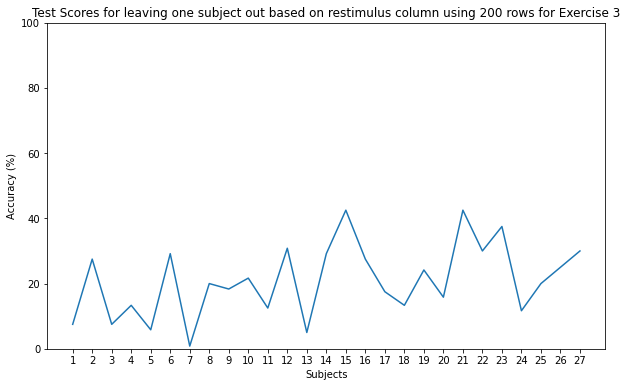

In [147]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(np.arange(1,28), test_acc_leave_one_ex3)
ax.set_title("Test Scores for leaving one subject out based on restimulus column using 200 rows for Exercise 3")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.set_xticks(np.arange(1,28));

In [176]:
ex1_mean = np.mean(test_acc_leave_one_ex1)
ex2_mean = np.mean(test_acc_leave_one_ex2)
ex3_mean = np.mean(test_acc_leave_one_ex3)

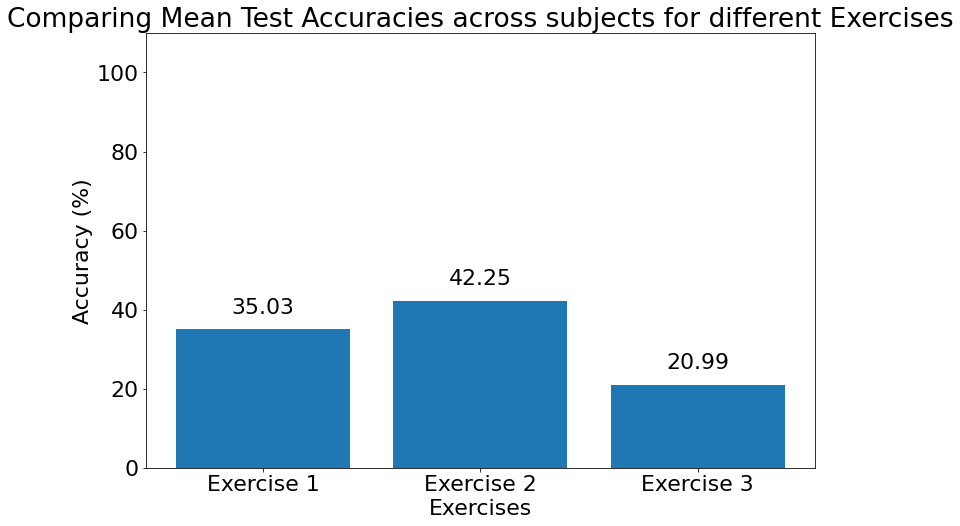

In [177]:
# Plot Bar graph to compare accuracy across exercises
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

exercises = ["Exercise 1", "Exercise 2", "Exercise 3"]
mean_accs = [ex1_mean, ex2_mean, ex3_mean]
ax.bar(exercises, mean_accs)
ax.set_title("Comparing Mean Test Accuracies across subjects for each Exercise")
ax.set_xlabel("Exercises")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accs):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

# All Exercises Combined Classification using fixed length signal of 2 seconds (200 rows) based on restimulus column

## All Exercises Combined Classification using fixed length signal of 2 seconds (200 rows) based on restimulus column per subject

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

# training_acc_subjects = []
test_acc_all_movements_per_sub = []

ex1_movements = list(range(1,13))
ex2_movements = list(range(1,18))
ex3_movements = list(range(1,24))

# Iterate over 27 subjects of DB1 and trying to classify all exercises combined
for sub in list(range(1,28)):
    
    # Load the data for exercise 1
    data = load_data_DB1(subject=sub, exercise=1)
    
    # Iterate over all movements and add exercise 1 movement repetitions into a df
    ex1_df = pd.DataFrame()
    for m in ex1_movements:
        ex1_df = ex1_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    
    # Load the data for exercise 2
    data = load_data_DB1(subject=sub, exercise=2)

    # Iterate over all movements and add exercise 2 movement repetitions into a df
    ex2_df = pd.DataFrame()
    for m in ex2_movements:
        ex2_df = ex2_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Add 12 to target column of exercise 2 dataframe. The 12 number represents the number of movements in exercise 1
    ex2_df["target"] = ex2_df["target"] + 12
    
    # Load the data for exercise 3
    data = load_data_DB1(subject=sub, exercise=3)
    
    # Iterate over all movements and add exercise 3 movement repetitions into a df
    ex3_df = pd.DataFrame()
    for m in ex3_movements:
        ex3_df = ex3_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Add 29 to target column of exercise 3 dataframe. 
    # The 29 number represents the number of movements in exercise 1 plus the number of movements in exercise 2.
    ex3_df["target"] = ex3_df["target"] + 29
    
    data_df = pd.DataFrame() # A dataframe to hold data of all movements combined
    
    # Append 3 exercises to one dataframe
    data_df = data_df.append(ex1_df, ignore_index=True)
    data_df = data_df.append(ex2_df, ignore_index=True)
    data_df = data_df.append(ex3_df, ignore_index=True)
    
    
    # Getting X & y
    X = data_df.drop("target", axis=1)
    y = data_df["target"]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100)

    #Fitting the model
    clf.fit(X_train, y_train)
    
    score = round(clf.score(X_test, y_test) * 100, 2)
    test_acc_states.append(score)

#     print(f"Average Training Accuracy for subject {sub} in all exercises combined is {training_mean_states}")
    print(f"Test Accuracy for subject {sub} for all 52 movements combined is {score}")
    print("-----------------------------------------------------------------------------------")
#     training_acc_subjects.append(training_mean_states)
    test_acc_all_movements_per_sub.append(score)


# print(f"Average Training Accuracy for all subjects in all exercises combined {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracy for all subjects for all 52 movements combined {np.mean(test_acc_all_movements_per_sub)}")



Test Accuracy for subject 1 for all 52 movements combined is 80.77
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 for all 52 movements combined is 77.88
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 for all 52 movements combined is 73.08
-----------------------------------------------------------------------------------
Test Accuracy for subject 4 for all 52 movements combined is 79.81
-----------------------------------------------------------------------------------
Test Accuracy for subject 5 for all 52 movements combined is 73.08
-----------------------------------------------------------------------------------
Test Accuracy for subject 6 for all 52 movements combined is 80.77
-----------------------------------------------------------------------------------
Test Accuracy for subject 7 for all 52 movements combined is 84.62
---------------------------

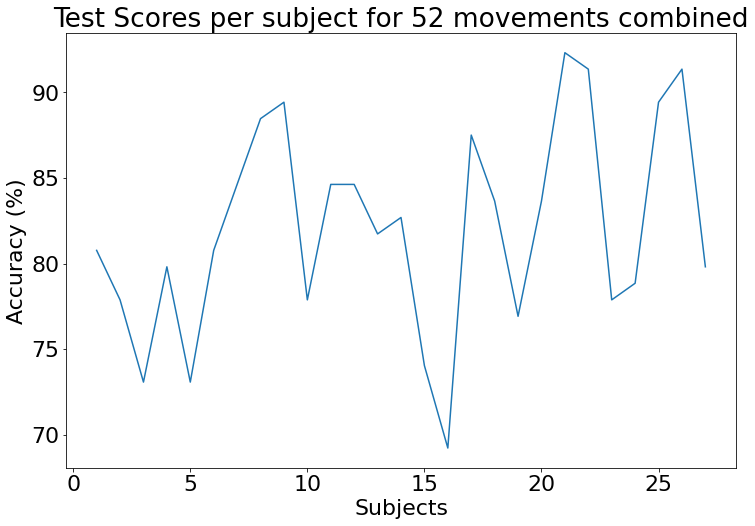

In [179]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

ax.plot(np.arange(1,28), test_acc_all_movements_per_sub)
ax.set_title("Test Scores per subject for 52 movements combined")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)");
# ax.set_xticks(np.arange(1,28));

## Classification of 52 movements using leave-one-out approach 

In [183]:
ex1_movements = list(range(1,13))
ex2_movements = list(range(1,18))
ex3_movements = list(range(1,24))

all_exercises_df = pd.DataFrame()
# Load the data for all subjects except 1 to do leave-one out classification
for s in list(range(1,28)):
    ex1_df = pd.DataFrame()
    data = load_data_DB1(subject=s, exercise=1)
    # Iterate over all movements and add them into a df
    for m in ex1_movements:
        ex1_df = ex1_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
        
    ex2_df = pd.DataFrame()
    data = load_data_DB1(subject=s, exercise=2)
    # Iterate over all movements and add them into a df
    for m in ex2_movements:
        ex2_df = ex2_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    ex2_df["target"] = ex2_df["target"] + 12
    
    ex3_df = pd.DataFrame()
    data = load_data_DB1(subject=s, exercise=3)
    # Iterate over all movements and add them into a df
    for m in ex3_movements:
        ex3_df = ex3_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
        
    ex3_df["target"] = ex3_df["target"] + 12 + 17
    all_exercises_df = all_exercises_df.append(ex1_df, ignore_index=True)
    all_exercises_df = all_exercises_df.append(ex2_df, ignore_index=True)
    all_exercises_df = all_exercises_df.append(ex3_df, ignore_index=True)
all_exercises_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0171,0.0073,0.0024,0.0024,0.0024,0.0024,0.0757,0.0317,0.0024,0.0146,...,0.0024,0.0195,0.0024,0.0024,0.0024,0.0146,0.0488,0.0073,0.0024,1
1,0.0488,0.0073,0.0024,0.0024,0.0024,0.0024,0.0171,0.0488,0.0024,0.0049,...,0.0269,0.0024,0.0049,0.0024,0.0024,0.0806,0.0659,0.0024,0.0024,1
2,0.0073,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.0391,0.0024,0.0049,...,0.2197,0.0562,0.0024,0.0024,0.0024,0.1318,0.0439,0.2441,0.0122,1
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0342,0.0024,0.0098,...,0.3931,0.2759,0.0171,0.0024,0.0024,0.3101,0.0952,0.5103,0.1880,1
4,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.0244,0.0049,0.0024,...,0.1685,0.0024,0.0122,0.0024,0.0024,0.1196,0.0537,0.0513,0.0024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,0.6982,0.1538,0.4712,0.0195,0.0049,0.0024,0.0342,0.4712,1.1426,0.0732,...,0.7837,0.7764,0.2197,0.1538,0.0903,0.6226,1.0596,0.1489,0.0977,52
14036,0.2686,0.0537,0.1929,0.0049,0.0049,0.0024,0.0073,0.2075,0.1147,0.0635,...,1.1035,0.8374,0.2637,0.0562,0.0659,0.4175,0.5835,0.2637,0.0537,52
14037,0.3491,0.1392,0.3320,0.0049,0.0024,0.0024,0.0122,0.2515,0.0732,0.0586,...,0.5273,0.4785,0.1025,0.0098,0.0439,0.3735,0.4492,0.1563,0.0732,52
14038,0.0757,0.0049,0.1172,0.0049,0.0049,0.0024,0.0049,0.0977,0.0659,0.0684,...,0.4639,0.1538,0.0659,0.0122,0.0146,0.6006,0.5444,0.1514,0.0684,52


In [187]:
all_exercises_df[0:120+170+230]

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0171,0.0073,0.0024,0.0024,0.0024,0.0024,0.0757,0.0317,0.0024,0.0146,...,0.0024,0.0195,0.0024,0.0024,0.0024,0.0146,0.0488,0.0073,0.0024,1
1,0.0488,0.0073,0.0024,0.0024,0.0024,0.0024,0.0171,0.0488,0.0024,0.0049,...,0.0269,0.0024,0.0049,0.0024,0.0024,0.0806,0.0659,0.0024,0.0024,1
2,0.0073,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.0391,0.0024,0.0049,...,0.2197,0.0562,0.0024,0.0024,0.0024,0.1318,0.0439,0.2441,0.0122,1
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0342,0.0024,0.0098,...,0.3931,0.2759,0.0171,0.0024,0.0024,0.3101,0.0952,0.5103,0.1880,1
4,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.0244,0.0049,0.0024,...,0.1685,0.0024,0.0122,0.0024,0.0024,0.1196,0.0537,0.0513,0.0024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.6323,0.5566,0.1904,0.0659,0.0269,0.0513,1.1694,1.5430,0.1587,0.0049,...,0.2490,0.0439,0.0024,0.0293,0.0146,0.3027,0.7690,0.1392,0.0024,52
516,0.0024,0.0024,0.0024,0.0024,0.0220,0.0024,0.0024,0.0024,0.0903,0.0024,...,0.5078,0.2954,0.1196,0.0464,0.0635,1.0840,1.5039,0.1758,0.0098,52
517,0.0024,0.0220,0.0024,0.0024,0.0171,0.0024,0.0024,0.0415,0.1196,0.0024,...,0.2197,0.0049,0.0024,0.0513,0.0195,0.6201,0.9033,0.1392,0.0024,52
518,0.0220,0.0024,0.0024,0.0024,0.1270,0.0195,0.2148,0.3369,0.1245,0.0024,...,0.1904,0.0171,0.0024,0.1074,0.0342,0.5786,0.7788,0.1514,0.0024,52


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# training_acc_subjects = []
test_acc_leave_one_allExercises = []


# Iterate over 27 subjects of Database 1 and trying to classify all exercises combined
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * (120 + 170 + 230)
    end_idx_rows = start_idx_rows + (120 + 170 + 230)
    training_data = all_exercises_df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    test_data = all_exercises_df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    
    
#     training_score = clf.score(X_train, y_train)
    test_score = round(clf.score(X_test, y_test) * 100, 2)
#     training_acc_subjects.append(training_score)
    test_acc_leave_one_allExercises.append(test_score)
    
    # Display the subject results
#     print(f"The training accuracy leave subject {sub} out is {training_score}")
    print(f"The test accuracy leaving subject {sub} out for all exercises combined is {test_score}")
    print("-------------------------------------------------------------")
    
# print(f"Average Training Accuracies leaving each subject out once is {np.mean(training_acc_subjects)}")
print(f"Average Test Accuracies leaving each subject out once for all exercises combined is {round(np.mean(test_acc_leave_one_allExercises),2)}")
    
   

The test accuracy leaving subject 1 out for all exercises combined is 19.81
-------------------------------------------------------------
The test accuracy leaving subject 2 out for all exercises combined is 7.12
-------------------------------------------------------------
The test accuracy leaving subject 3 out for all exercises combined is 25.96
-------------------------------------------------------------
The test accuracy leaving subject 4 out for all exercises combined is 20.19
-------------------------------------------------------------
The test accuracy leaving subject 5 out for all exercises combined is 19.23
-------------------------------------------------------------
The test accuracy leaving subject 6 out for all exercises combined is 26.35
-------------------------------------------------------------
The test accuracy leaving subject 7 out for all exercises combined is 14.62
-------------------------------------------------------------
The test accuracy leaving subject 8

(0.0, 110.0)

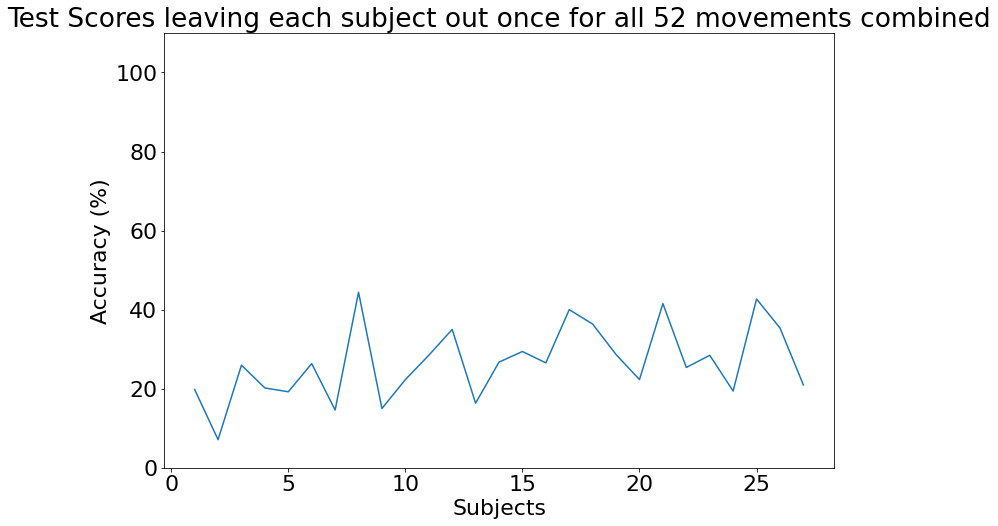

In [192]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

ax.plot(np.arange(1,28), test_acc_leave_one_allExercises)
ax.set_title("Test Scores leaving each subject out once for all 52 movements combined")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)");
ax.set_ylim(0,110)
# ax.set_xticks(np.arange(1,28));